In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pandas Dataset

In [ ]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/high_senior_result.csv')
df.head()

,student_id,problem_id,curriculum_id,name,problem_cr,result,level,type,avg_cr,o_cr,x_cr,update_datetime
0,I100008,508171,21,확률의 뜻,0.632113,CORRECT,2,0,63,65,57,2021-01-04 11:40:50
1,I100008,399004,21,확률의 뜻,-0.557984,CORRECT,4,2,63,65,57,2021-01-04 11:40:50
2,I100008,508131,17,확률의 곱셈정리,0.171439,CORRECT,3,0,63,65,57,2021-01-04 11:40:50
3,I100008,399631,15,사건의 독립과 종속,1.454540,CORRECT,2,0,63,65,57,2021-01-04 11:40:50
4,I100008,399781,7,연속확률변수,-2.632940,WRONG,4,2,63,65,57,2021-01-04 11:40:50


## datetime 활용
2020, 2021 데이터 활용해서 훈련
(2022는 finetuning 활용?)

In [ ]:
df['update_datetime'] = pd.to_datetime(df['update_datetime'])

In [ ]:
df['update_year'] = df['update_datetime'].dt.year
df['update_month'] = df['update_datetime'].dt.month
df

,student_id,problem_id,curriculum_id,name,problem_cr,result,level,type,avg_cr,o_cr,x_cr,update_datetime,update_year,update_month
0,I100008,508171,21,확률의 뜻,0.632113,CORRECT,2,0,63,65,57,2021-01-04 11:40:50,2021,1
1,I100008,399004,21,확률의 뜻,-0.557984,CORRECT,4,2,63,65,57,2021-01-04 11:40:50,2021,1
2,I100008,508131,17,확률의 곱셈정리,0.171439,CORRECT,3,0,63,65,57,2021-01-04 11:40:50,2021,1
3,I100008,399631,15,사건의 독립과 종속,1.454540,CORRECT,2,0,63,65,57,2021-01-04 11:40:50,2021,1
4,I100008,399781,7,연속확률변수,-2.632940,WRONG,4,2,63,65,57,2021-01-04 11:40:50,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265550,I99685,446377,9,정규분포,0.978203,WRONG,3,0,63,69,58,2021-06-17 20:34:53,2021,6
3265551,I99685,400841,9,정규분포,-0.869958,WRONG,3,2,63,69,58,2021-06-17 20:34:53,2021,6
3265552,I99685,511458,9,정규분포,0.019666,WRONG,3,0,63,69,58,2021-06-17 20:34:53,2021,6
3265553,I99685,508537,9,정규분포,-0.019859,WRONG,3,0,63,69,58,2021-06-17 20:34:53,2021,6


In [ ]:
df['update_year'].unique()

array([2021, 2022, 2020])

In [ ]:
df_use = df[df['update_year'] != 2022]
df_use.head()

,student_id,problem_id,curriculum_id,name,problem_cr,result,level,type,avg_cr,o_cr,x_cr,update_datetime,update_year,update_month
0,I100008,508171,21,확률의 뜻,0.632113,CORRECT,2,0,63,65,57,2021-01-04 11:40:50,2021,1
1,I100008,399004,21,확률의 뜻,-0.557984,CORRECT,4,2,63,65,57,2021-01-04 11:40:50,2021,1
2,I100008,508131,17,확률의 곱셈정리,0.171439,CORRECT,3,0,63,65,57,2021-01-04 11:40:50,2021,1
3,I100008,399631,15,사건의 독립과 종속,1.454540,CORRECT,2,0,63,65,57,2021-01-04 11:40:50,2021,1
4,I100008,399781,7,연속확률변수,-2.632940,WRONG,4,2,63,65,57,2021-01-04 11:40:50,2021,1


In [ ]:
df_2022 = df[df['update_year'] == 2022]
df_2022.head()

,student_id,problem_id,curriculum_id,name,problem_cr,result,level,type,avg_cr,o_cr,x_cr,update_datetime,update_year,update_month
847,I100067,584855,33,지수함수와 로그함수의 미분,0.043118,CORRECT,3,2,62,64,51,2022-01-10 18:49:52,2022,1
848,I100067,435439,33,지수함수와 로그함수의 미분,-0.164510,CORRECT,3,0,62,64,51,2022-01-10 18:49:52,2022,1
849,I100067,580450,33,지수함수와 로그함수의 미분,-0.010880,CORRECT,3,2,62,64,51,2022-01-10 18:49:52,2022,1
850,I100067,513317,33,지수함수와 로그함수의 미분,0.103597,CORRECT,3,0,62,64,51,2022-01-10 18:49:52,2022,1
851,I100067,435503,33,지수함수와 로그함수의 미분,-0.784152,CORRECT,3,0,62,64,51,2022-01-10 18:49:52,2022,1


In [ ]:
df_2022 = df_2022[['avg_cr', 'o_cr', 'x_cr', 'curriculum_id', 'type', 'problem_cr', 'result']]
df_2022

,avg_cr,o_cr,x_cr,curriculum_id,type,problem_cr,result
847,62,64,51,33,2,0.043118,CORRECT
848,62,64,51,33,0,-0.164510,CORRECT
849,62,64,51,33,2,-0.010880,CORRECT
850,62,64,51,33,0,0.103597,CORRECT
851,62,64,51,33,0,-0.784152,CORRECT
...,...,...,...,...,...,...,...
3258186,70,71,66,18,0,0.969386,WRONG
3258187,70,71,66,18,0,0.990076,WRONG
3258188,70,71,66,9,0,0.575786,CORRECT
3258189,70,71,66,13,0,0.101836,WRONG


In [ ]:
len(df_use)

1958665

In [ ]:
df_use = df_use[['avg_cr', 'o_cr', 'x_cr', 'curriculum_id', 'type', 'problem_cr', 'result']]
df_use

,avg_cr,o_cr,x_cr,curriculum_id,type,problem_cr,result
0,63,65,57,21,0,0.632113,CORRECT
1,63,65,57,21,2,-0.557984,CORRECT
2,63,65,57,17,0,0.171439,CORRECT
3,63,65,57,15,0,1.454540,CORRECT
4,63,65,57,7,2,-2.632940,WRONG
...,...,...,...,...,...,...,...
3265550,63,69,58,9,0,0.978203,WRONG
3265551,63,69,58,9,2,-0.869958,WRONG
3265552,63,69,58,9,0,0.019666,WRONG
3265553,63,69,58,9,0,-0.019859,WRONG


## correct가 wrong보다 많긴함 (일단 처리 안하고 ㄲ)

In [ ]:
len(df_use[df_use['result'] == 'CORRECT'])

1465570

In [ ]:
len(df_use[df_use['result'] == 'WRONG'])

493095

In [ ]:
df_use

,avg_cr,o_cr,x_cr,curriculum_id,type,problem_cr,result
0,63,65,57,21,0,0.632113,CORRECT
1,63,65,57,21,2,-0.557984,CORRECT
2,63,65,57,17,0,0.171439,CORRECT
3,63,65,57,15,0,1.454540,CORRECT
4,63,65,57,7,2,-2.632940,WRONG
...,...,...,...,...,...,...,...
3265550,63,69,58,9,0,0.978203,WRONG
3265551,63,69,58,9,2,-0.869958,WRONG
3265552,63,69,58,9,0,0.019666,WRONG
3265553,63,69,58,9,0,-0.019859,WRONG


In [ ]:
correct_index_list = list(df_use[df_use['result']=='CORRECT'].index)
correct_index_list

[0,
 1,
 2,
 3,
 6,
 7,
 8,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 77,
 84,
 85,
 87,
 88,
 89,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 102,
 103,
 106,
 107,
 108,
 109,
 110,
 111,
 113,
 115,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 131,
 132,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 215,
 216,
 222,
 223,
 224,
 232,
 233,
 234,
 23

In [ ]:
import random

correct_index_list_sampled = random.sample(correct_index_list, 1000000)

In [ ]:
df_use = df_use.loc[~df_use.index.isin(correct_index_list_sampled)]
df_use

,avg_cr,o_cr,x_cr,curriculum_id,type,problem_cr,result
2,63,65,57,17,0,0.171439,CORRECT
4,63,65,57,7,2,-2.632940,WRONG
5,63,65,57,6,0,-1.111420,WRONG
6,63,65,57,10,0,-0.832890,CORRECT
7,63,65,57,9,2,-1.317680,CORRECT
...,...,...,...,...,...,...,...
3265550,63,69,58,9,0,0.978203,WRONG
3265551,63,69,58,9,2,-0.869958,WRONG
3265552,63,69,58,9,0,0.019666,WRONG
3265553,63,69,58,9,0,-0.019859,WRONG


In [ ]:
len(df_use[df_use['result'] == 'CORRECT'])

465570

In [ ]:
len(df_use[df_use['result'] == 'WRONG'])

493095

In [ ]:
df_use = df_use.reset_index(drop=True)
df_use

,avg_cr,o_cr,x_cr,curriculum_id,type,problem_cr,result
0,63,65,57,17,0,0.171439,CORRECT
1,63,65,57,7,2,-2.632940,WRONG
2,63,65,57,6,0,-1.111420,WRONG
3,63,65,57,10,0,-0.832890,CORRECT
4,63,65,57,9,2,-1.317680,CORRECT
...,...,...,...,...,...,...,...
958660,63,69,58,9,0,0.978203,WRONG
958661,63,69,58,9,2,-0.869958,WRONG
958662,63,69,58,9,0,0.019666,WRONG
958663,63,69,58,9,0,-0.019859,WRONG


# Dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class MyDataset(Dataset):
 
  def __init__(self, df):
    self.df = df
 
    student_values = self.df.iloc[:,0:3].values
    problem_discrete_values = self.df.iloc[:,3:5].values
    problem_conti_values = self.df.iloc[:,5].values

    asign = lambda t: 0 if t=='WRONG' else 1
    y = list(map(asign, self.df.iloc[:,6].values))
 
    self.student_values = torch.tensor(student_values, dtype=torch.int64)
    self.problem_discrete_values = torch.tensor(problem_discrete_values, dtype=torch.int64)
    self.problem_conti_values = torch.tensor(problem_conti_values).float()
    self.y = torch.tensor(y, dtype=torch.int64)
 
  def __len__(self):
    return len(self.y)
   
  def __getitem__(self,idx):
    return self.student_values[idx], self.problem_discrete_values[idx], self.problem_conti_values[idx], self.y[idx]

In [ ]:
train_num = int(len(df_use) * 0.9)
train_num

862798

In [ ]:
len(df_use) - train_num

95867

In [ ]:
df_percent = df_use.sample(frac=0.9)
df_percent

,avg_cr,o_cr,x_cr,curriculum_id,type,problem_cr,result
529900,66,68,62,36,0,-2.052670,CORRECT
887113,68,69,64,60,0,0.017024,WRONG
119665,77,81,69,58,0,0.879703,CORRECT
742497,68,74,64,25,2,-0.804968,WRONG
327229,60,62,50,15,0,-0.008645,WRONG
...,...,...,...,...,...,...,...
865995,67,69,57,13,0,-0.692013,CORRECT
536381,68,69,61,18,0,0.869124,WRONG
524432,76,79,70,36,0,0.552105,CORRECT
953095,60,64,48,16,0,-1.001050,WRONG


In [ ]:
df_rest = df_use.loc[~df_use.index.isin(df_percent.index)]
df_rest

,avg_cr,o_cr,x_cr,curriculum_id,type,problem_cr,result
27,63,65,57,35,0,0.872802,CORRECT
70,63,65,57,37,0,-0.797001,CORRECT
97,63,65,57,33,2,-0.580580,WRONG
99,63,65,57,34,2,0.355650,CORRECT
111,63,65,57,34,2,-0.853011,WRONG
...,...,...,...,...,...,...,...
958583,63,69,58,63,0,0.353224,WRONG
958593,63,69,58,36,0,-0.549843,WRONG
958618,63,69,58,18,0,0.137893,WRONG
958619,63,69,58,17,0,0.740803,CORRECT


In [ ]:
train_ds = MyDataset(df_percent)
test_ds = MyDataset(df_rest)

In [ ]:
test_ds = MyDataset(df_2022)

In [ ]:
len(train_ds)

862798

In [ ]:
len(test_ds)

1306890

In [ ]:
train_ds[5]

(tensor([73, 75, 65]), tensor([25,  0]), tensor(-0.0739), tensor(1))

In [ ]:
train_ds[:5]

(tensor([[66, 68, 62],
         [68, 69, 64],
         [77, 81, 69],
         [68, 74, 64],
         [60, 62, 50]]), tensor([[36,  0],
         [60,  0],
         [58,  0],
         [25,  2],
         [15,  0]]), tensor([-2.0527,  0.0170,  0.8797, -0.8050, -0.0086]), tensor([1, 0, 1, 0, 0]))

# DataLoader

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_ds, batch_size=256, shuffle=True, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_ds, batch_size=256, shuffle=False, num_workers=2)

In [ ]:
len(train_dataloader)

3371

# Model 정의

In [ ]:
df_use

,avg_cr,o_cr,x_cr,curriculum_id,type,problem_cr,result
0,63,65,57,17,0,0.171439,CORRECT
1,63,65,57,7,2,-2.632940,WRONG
2,63,65,57,6,0,-1.111420,WRONG
3,63,65,57,10,0,-0.832890,CORRECT
4,63,65,57,9,2,-1.317680,CORRECT
...,...,...,...,...,...,...,...
958660,63,69,58,9,0,0.978203,WRONG
958661,63,69,58,9,2,-0.869958,WRONG
958662,63,69,58,9,0,0.019666,WRONG
958663,63,69,58,9,0,-0.019859,WRONG


In [ ]:
class MyModel(nn.Module) :
    def __init__(self, score_range=100, curriculum_id=321, type_count=3):
        super(MyModel, self).__init__()

        self.embedding1 = nn.Embedding(score_range, 30)
        self.embedding2 = nn.Embedding(score_range, 30)
        self.embedding3 = nn.Embedding(score_range, 30)
        self.embedding4 = nn.Embedding(curriculum_id, 50)
        self.embedding5 = nn.Embedding(type_count, 10)

        self.layers1 = nn.Sequential(
            nn.Linear(180, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
        )

        self.layers2 = nn.Sequential(
            nn.Linear(256, 256),
            nn.BatchNorm1d(256)
        )
        
        self.layers3 = nn.Sequential(
            nn.ReLU(),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x1, x2, x3, x4, x5, x6):
        student_1 = self.embedding1(x1)
        student_1 = torch.squeeze(student_1, 1)

        student_2 = self.embedding2(x2)
        student_2 = torch.squeeze(student_2, 1)

        student_3 = self.embedding3(x3)
        student_3 = torch.squeeze(student_3, 1)

        problem_1 = self.embedding4(x4)
        problem_1 = torch.squeeze(problem_1, 1)

        problem_2 = self.embedding5(x5)
        problem_2 = torch.squeeze(problem_2, 1)

        st_pr = torch.cat((student_1, student_2, student_3, problem_1, problem_2, x6), 1)
        
        st_pr = self.layers1(st_pr)
        identity = st_pr
        st_pr = self.layers2(st_pr)
        st_pr += identity
        st_pr = self.layers3(st_pr)
        return st_pr

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
test_model = MyModel().to(device)
test_model

MyModel(
  (embedding1): Embedding(100, 30)
  (embedding2): Embedding(100, 30)
  (embedding3): Embedding(100, 30)
  (embedding4): Embedding(321, 50)
  (embedding5): Embedding(3, 10)
  (layers1): Sequential(
    (0): Linear(in_features=180, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layers2): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layers3): Sequential(
    (0): ReLU()
    (1): Linear(in_features=256, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=2, bias=True)
  )
)

# Train

In [ ]:
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(test_model.parameters(), lr=0.001) # 보통 Adam의 learning rate로 0.001 사용

In [ ]:
with torch.no_grad():
    for i, data in enumerate(train_dataloader, 0):
        input1, input2, input3, labels = data
        print(input1.shape)

        x1, x2, x3 = torch.split(input1, [1,1,1], dim=1)
        x4, x5 = torch.split(input2, [1,1], dim=1)
        input3 = torch.unsqueeze(input3, 1)
        input3 = input3.expand(input3.shape[0], 30)

        x1, x2, x3, x4, x5, input3, labels = x1.to(device), x2.to(device), x3.to(device), x4.to(device), x5.to(device), input3.to(device), labels.to(device)

        output = test_model.forward(x1, x2, x3, x4, x5, input3)
        #print(output)

        loss = criterion(output, labels)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(output.max(1)[1]) # 예측한 클래스
        print(labels) # 실제 클래스
        correct = (output.max(1)[1] == labels).sum().item() # 맞게 예측한 클래스 개수
        print(correct)

        break

torch.Size([256, 3])
0.5157414078712463
tensor([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
      

In [ ]:
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [ ]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    test_model.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, data in enumerate(train_dataloader):
        input1, input2, input3, targets = data
        x1, x2, x3 = torch.split(input1, [1,1,1], dim=1)
        x4, x5 = torch.split(input2, [1,1], dim=1)
        input3 = torch.unsqueeze(input3, 1)
        input3 = input3.expand(input3.shape[0], 30)
        x1, x2, x3, x4, x5, input3, targets = x1.to(device), x2.to(device), x3.to(device), x4.to(device), x5.to(device), input3.to(device), targets.to(device)
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = test_model.forward(x1, x2, x3, x4, x5, input3) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 1000 == 999:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 1000 batches: {running_loss / 1000}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [ ]:
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    test_model.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs1, inputs2, inputs3, targets) in enumerate(test_dataloader):
            input1, input2, input3, targets = data
            x1, x2, x3 = torch.split(input1, [1,1,1], dim=1)
            x4, x5 = torch.split(input2, [1,1], dim=1)
            input3 = torch.unsqueeze(input3, 1)
            input3 = input3.expand(input3.shape[0], 30)
            x1, x2, x3, x4, x5, input3, targets = x1.to(device), x2.to(device), x3.to(device), x4.to(device), x5.to(device), input3.to(device), targets.to(device)

            outputs = test_model.forward(x1, x2, x3, x4, x5, input3)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

# Training

In [ ]:
num_epoch = 50

In [ ]:
# 연습 삼아 5 epoch만 진행
# 실제로 훈련할때는 올바른 epoch 설정 필요

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)
    if (epoch+1) % 5 == 0:
      torch.save(test_model.state_dict(), f'./test_model_epoch_{epoch+1}.pt')


[ Train epoch: 1 ]

Current batch: 1000
Average train loss of recent 1000 batches: 0.6076019988656044

Current batch: 2000
Average train loss of recent 1000 batches: 0.5901608240008355

Current batch: 3000
Average train loss of recent 1000 batches: 0.588298358976841

Total train accuarcy: 68.01603619850765
Total train loss: 0.5940357384608146

[ Test epoch: 1 ]

Test accuarcy: 73.828125
Test average loss: 0.5395489931106567

[ Train epoch: 2 ]

Current batch: 1000
Average train loss of recent 1000 batches: 0.5834205373525619

Current batch: 2000
Average train loss of recent 1000 batches: 0.5839688819050789

Current batch: 3000
Average train loss of recent 1000 batches: 0.5820503778457642

Total train accuarcy: 68.89561635516077
Total train loss: 0.5831082077275324

[ Test epoch: 2 ]

Test accuarcy: 72.265625
Test average loss: 0.5394011735916138

[ Train epoch: 3 ]

Current batch: 1000
Average train loss of recent 1000 batches: 0.5814637433290482

Current batch: 2000
Average train los

In [ ]:
import matplotlib.pyplot as plt

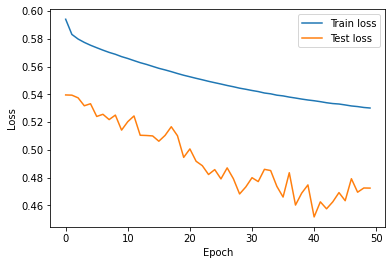

In [ ]:
plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

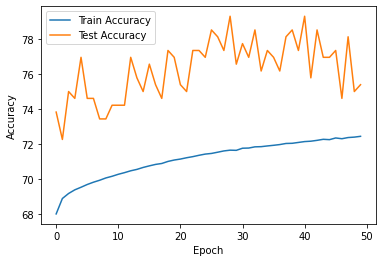

In [ ]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# 활용

ex) 70 85 65 vs 70 90 60

단원 = 17 (확률의 곱셈정리), type = 0, correct rate = 0.1

0 = wrong, 1 = correct


In [ ]:
x1 = torch.Tensor([[70],[70]]).int().to(device)
x2 = torch.Tensor([[85],[90]]).int().to(device)
x3 = torch.Tensor([[65],[60]]).int().to(device)
x4 = torch.Tensor([[17],[17]]).int().to(device)
x5 = torch.Tensor([[0],[0]]).int().to(device)
x6 = torch.Tensor([[0.1], [0.1]]).to(device)
x6 = x6.expand(x6.shape[0], 30)

In [ ]:
outputs = test_model(x1, x2, x3, x4, x5, x6)
outputs

tensor([[ 1.0892, -0.5989],
        [ 0.2084,  0.0356]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
torch.nn.functional.softmax(outputs, dim=1)

tensor([[0.8440, 0.1560],
        [0.5431, 0.4569]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

더 쉬운 문제?

In [ ]:
x6 = torch.Tensor([[1.0], [1.0]]).to(device)
x6 = x6.expand(x6.shape[0], 30)

In [ ]:
outputs = test_model(x1, x2, x3, x4, x5, x6)
torch.nn.functional.softmax(outputs, dim=1)

tensor([[0.4532, 0.5468],
        [0.2076, 0.7924]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

다른 단원에서는? 35 (수열의 극한)

In [ ]:
x4 = torch.Tensor([[35],[35]]).int().to(device)
outputs = test_model(x1, x2, x3, x4, x5, x6)
torch.nn.functional.softmax(outputs, dim=1)

tensor([[0.6951, 0.3049],
        [0.8106, 0.1894]], device='cuda:0', grad_fn=<SoftmaxBackward0>)